In [15]:
class Enot:
    def __init__(self, color, legs, name):
        self.color = color
        self.legs = legs
        self.name = name
        
    def polosk(self, do):
        self.do = do
        print(self.name, self.do)
        
our_enot = Enot('black', 4, 'енот')
print(our_enot.color)
our_enot.polosk('полощет')


black
енот полощет


35.28015621285405


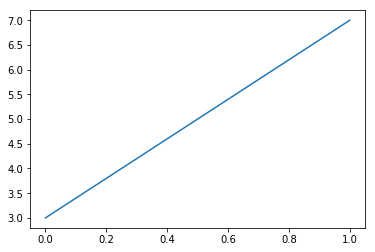

In [52]:
import math
import numpy as np
import matplotlib.pyplot as plt

arctg = math.atan

class ugol:
    def __init__(self, one_point, two_point):
        self.one_point = one_point
        self.two_point = two_point
        
    def ug(self):
        self.raschet = (arctg((self.two_point[0] - self.one_point[0])/(self.two_point[1] - self.one_point[1]))*3600)/60
        print(self.raschet)
    
    def otobr(self):
        otr = np.array([self.one_point[0], self.two_point[0]])
        plt.plot(otr)
        plt.show()

a = np.array([3,2])
b = np.array([7,8])
    
our_ugol = ugol(a, b)
our_ugol.ug()
our_ugol.otobr()

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

arctg = math.atan

first = 0
last = 600
trend_len = 60
all_znach=True
our_file = 'OlimpGrafik4.txt'
pok_rasch = True
pok_pr = False

class ugol:
    def __init__(self, our_file, first, last):
        mass=[]
        f = open(our_file)
        for line in f:
            line = line.replace('\n', '')
            mass.append([line.split(': ')])

        mass = np.array(mass)

        mass_mod = mass[:,0][:,1]
        mnenie_mass = mass[:,0][:,2]

        mass_mod = np.array(mass_mod, dtype=float)
        mnenie_mass = np.array(mnenie_mass, dtype=int)

        if all_znach==True:
            last = len(mnenie_mass)

        self.mnenie_mass = mnenie_mass[first:last]
        self.viborka = mass_mod[first:last]
        self.proizv = np.diff(self.viborka)
        
    def ug(self, one_point, two_point, chislo):
        
        raschet = np.array([])
        
        while two_point<=len(self.viborka):
            if one_point>0:
                one_point=one_point-1
            verh = (self.viborka[two_point-1] - self.viborka[one_point])*1000000
            niz = two_point - one_point
            delen = ((verh/niz)*3600)/60
            raschet = np.append(raschet, delen)
            
            one_point+=chislo
            two_point+=chislo
            
        self.raschet = raschet
        
    def analiz_rasch(self):
        
        j=0
        po_trendu=0
        protiv_trenda=0
        i = 0
        
        while j<len(self.raschet)-1:
            j+=1
            if (self.raschet[j]>0 and self.raschet[j-1]>0)or(self.raschet[j]<0 and self.raschet[j-1]<0):
                po_trendu+=1
            else:
                protiv_trenda+=1
                
        print('Ставки по тренду '+str(po_trendu)+' Ставки против тренда '+str(protiv_trenda))
        
    def otobr(self, massiv, pok_rasch, pok_pr):
        otr_1 = np.array([])
        
        if len(massiv)>0:
            otr = massiv
        elif pok_rasch==True:
            otr = self.raschet
        elif pok_pr == True:
            otr = self.proizv
        else:
            otr = self.viborka
        
        plt.rcParams["figure.dpi"] = 144.0
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 24
        fig_size[1] = 12
        plt.rcParams["figure.figsize"] = fig_size
        plt.plot(otr)
        plt.show()
        
    def schitaems(self, trend_len):
        
        raschet = np.array([])
        vrem_stavk = np.array([])
        mass_trend = np.array([])
        mass_vnutr_trend = np.array([])
        uspech_stavki=0
        neuspech_stavki=0
        delen=0
        stavka_time=0
        j=0
        stat=0
        
        stavka_vverh=False
        stavka_vniz=False
        
        for i in self.viborka:
            
            mass_trend = np.append(mass_trend, i)
            
            if len(mass_trend)>trend_len:
                mass_trend = np.delete(mass_trend,0)
            
            if j%60==0:
                verh = (i - self.viborka[j-trend_len])*1000000
                niz = j - (j-trend_len)
                delen = ((verh/niz)*3600)/60
                raschet = np.append(raschet, delen)
                
                
            j+=1
            
            if delen>60 and stavka_time==0 and stavka_vverh==False and stavka_vniz==False:
                stavka_vverh=True
                stavka_time=trend_len
            elif delen<(-60) and stavka_time==0 and stavka_vverh==False and stavka_vniz==False:
                stavka_vniz=True
                stavka_time=trend_len
                
            if (stavka_vverh==True and stavka_time>0) or (stavka_vniz==True and stavka_time>0):
                stavka_time-=1
            elif (stavka_vverh==True and stavka_time==0) or (stavka_vniz==True and stavka_time==0):
                if i>self.viborka[j-trend_len] and stavka_vverh==True:
                    uspech_stavki+=1
                    stavka_vverh=False
                elif i<self.viborka[j-trend_len] and stavka_vverh==True:
                    neuspech_stavki+=1
                    stavka_vverh=False
                elif i<self.viborka[j-trend_len] and stavka_vniz==True:
                    uspech_stavki+=1
                    stavka_vniz=False
                elif i>self.viborka[j-trend_len] and stavka_vniz==True:
                    neuspech_stavki+=1
                    stavka_vniz=False
                else:
                    stat+=1
                
        print(uspech_stavki,neuspech_stavki, len(raschet),stat, stat+uspech_stavki+neuspech_stavki, np.min(mass_trend), np.max(mass_trend), i, self.viborka[j-trend_len])
        
        return uspech_stavki,neuspech_stavki
    
    def proizvodnya(self, trend_len):
        
        raschet = np.array([])
        vrem_stavk = np.array([])
        mass_trend = np.array([])
        mass_vnutr_trend = np.array([])
        uspech_stavki=0
        neuspech_stavki=0
        delen=0
        stavka_time=0
        j=0
        stat=0
        
        stavka_vverh=False
        stavka_vniz=False
        
        print(len(self.viborka), len(self.proizv))
        
        for i in self.viborka:
                
            j+=1
            
            if j>1 and self.proizv[j-2]>0.000116 and stavka_time==0 and stavka_vverh==False and stavka_vniz==False:
                stavka_vniz=True
                stavka_time=trend_len
            elif j>1 and self.proizv[j-2]<(-0.000116) and stavka_time==0 and stavka_vverh==False and stavka_vniz==False:
                stavka_vverh=True
                stavka_time=trend_len
                
            if (stavka_vverh==True and stavka_time>0) or (stavka_vniz==True and stavka_time>0):
                stavka_time-=1
            elif (stavka_vverh==True and stavka_time==0) or (stavka_vniz==True and stavka_time==0):
                if i>self.viborka[j-trend_len] and stavka_vverh==True:
                    uspech_stavki+=1
                    stavka_vverh=False
                elif i<self.viborka[j-trend_len] and stavka_vverh==True:
                    neuspech_stavki+=1
                    stavka_vverh=False
                elif i<self.viborka[j-trend_len] and stavka_vniz==True:
                    uspech_stavki+=1
                    stavka_vniz=False
                elif i>self.viborka[j-trend_len] and stavka_vniz==True:
                    neuspech_stavki+=1
                    stavka_vniz=False
                else:
                    stat+=1
                
        print(uspech_stavki,neuspech_stavki)
        
        
    
        return uspech_stavki,neuspech_stavki
    
our_ugol = ugol(our_file, first, last)
our_ugol.ug(0, trend_len, trend_len)
#our_ugol.otobr(np.array([]), pok_rasch)
#mass_sum = np.array(our_ugol.schitaems(trend_len))
#our_ugol.ug(0, 600, 600)
#mass_sum = np.array(our_ugol.schitaems(600))
mass_sum = np.array(our_ugol.proizvodnya(trend_len))
#our_ugol.analiz_rasch()

#our_ugol.otobr(np.array([]), pok_rasch,pok_pr)
our_ugol.otobr(np.array([]), False, False)
our_ugol.otobr(np.array([]), False, True)

71100 71099
32 21


<Figure size 3456x1728 with 1 Axes>

<Figure size 3456x1728 with 1 Axes>

In [101]:
a = 1000
i=0
m=0
sum = mass_sum[0]
anti_sum = mass_sum[1]

m=((a*0.1)*0.80)*sum
n=(a*0.1)*anti_sum
    
print(m-n)
print(sum, anti_sum)

460.0
32 21


In [15]:
from talib.abstract import *

inputs = our_ugol.viborka

print(inputs)

# uses close prices (default)
output = SMA(inputs, timeperiod=25)

# uses open prices
output = SMA(inputs, timeperiod=25, price='open')

# uses close prices (default)
upper, middle, lower = BBANDS(inputs, 20, 2, 2)

# uses high, low, close (default)
slowk, slowd = STOCH(inputs, 5, 3, 0, 3, 0) # uses high, low, close by default

# uses high, low, open instead
slowk, slowd = STOCH(inputs, 5, 3, 0, 3, 0, prices=['high', 'low', 'open'])

[1.13791 1.13791 1.13793 ... 1.134   1.134   1.13399]


TypeError: only size-1 arrays can be converted to Python scalars